<a href="https://colab.research.google.com/github/tmpereiram/TrabajoPractivo/blob/main/TrabajoPractico_VisualizacionDeDatos_TaniaPereira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [95]:
#Cargamos el dataset de los crimenes cometidos en Brasil
url = 'https://github.com/tmpereiram/TrabajoPractivo/blob/main/Crimes_brasil_uf.csv?raw=true'
df = pd.read_csv(url, sep=';')
df.head(5)

,Estado,Tipo de crimen,Ocurrencias,Fecha
0,Acre,Violacion,31,01/01/2022
1,Acre,Hurto en el vehiculo,50,01/01/2022
2,Acre,Homicidio doloso,10,01/01/2022
3,Acre,Lesiones corporales seguidas de muerte,1,01/01/2022
4,Acre,Robo a entidad financiera,0,01/01/2022


In [97]:
#Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22338 entries, 0 to 22337
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Estado          22338 non-null  object
 1   Tipo de crimen  22338 non-null  object
 2   Ocurrencias     22338 non-null  int64 
 3   Fecha           22338 non-null  object
dtypes: int64(1), object(3)
memory usage: 698.2+ KB


In [98]:
#Renombrando las columnas, quitando espacios y mayusculas a los  nombres
df.rename(columns={'Estado': 'estado'},inplace=True)
df.rename(columns={'Tipo de crimen': 'crimen'},inplace=True)
df.rename(columns={'Ocurrencias': 'ocurrencias'},inplace=True)
df.rename(columns={'Fecha': 'fecha'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22338 entries, 0 to 22337
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   estado       22338 non-null  object
 1   crimen       22338 non-null  object
 2   ocurrencias  22338 non-null  int64 
 3   fecha        22338 non-null  object
dtypes: int64(1), object(3)
memory usage: 698.2+ KB


In [99]:
#Muestra los valores distintos para Estado
df.estado.unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espirito Santo', 'Goiás', 'Maranhao',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraiba', 'Paraná', 'Pernambuco', 'Piaui', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondonia', 'Roraima',
       'Santa Catarina', 'San Pablo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [100]:
#Muestra los valores distintos para Estado
df.crimen.unique()

array(['Violacion', 'Hurto en el vehiculo', 'Homicidio doloso',
       'Lesiones corporales seguidas de muerte',
       'Robo a entidad financiera', 'Robo de mercancia',
       'Robo de vehiculo', 'Robo seguido de muerte',
       'Tentativa de homicidio'], dtype=object)

In [101]:
#Añadimos la columna: is_dead para contabilizar los tipos de crimenes en los cuales hubo al menos una persona fallecida a causa del mismo
###############################################
def is_dead_row(row):
  return row['crimen'] in ('Homicidio doloso','Lesiones corporales seguidas de muerte','Robo seguido de muerte')

df['is_dead'] = df.apply(is_dead_row, axis='columns')
df['is_dead'] = df['is_dead'].replace([False, True],[0,1])

#Imprimimos las Primeras 5 filas
df.head(5)


,estado,crimen,ocurrencias,fecha,is_dead
0,Acre,Violacion,31,01/01/2022,0
1,Acre,Hurto en el vehiculo,50,01/01/2022,0
2,Acre,Homicidio doloso,10,01/01/2022,1
3,Acre,Lesiones corporales seguidas de muerte,1,01/01/2022,1
4,Acre,Robo a entidad financiera,0,01/01/2022,0


In [102]:
df['fecha'] = pd.to_datetime(df['fecha'],format="%m/%d/%Y")
df.head(5)

,estado,crimen,ocurrencias,fecha,is_dead
0,Acre,Violacion,31,2022-01-01,0
1,Acre,Hurto en el vehiculo,50,2022-01-01,0
2,Acre,Homicidio doloso,10,2022-01-01,1
3,Acre,Lesiones corporales seguidas de muerte,1,2022-01-01,1
4,Acre,Robo a entidad financiera,0,2022-01-01,0


In [103]:
# Crear una nueva columna solo pare el año

df['year'] =  df['fecha'].dt.strftime('%Y')


In [104]:
df.head(5)

,estado,crimen,ocurrencias,fecha,is_dead,year
0,Acre,Violacion,31,2022-01-01,0,2022
1,Acre,Hurto en el vehiculo,50,2022-01-01,0,2022
2,Acre,Homicidio doloso,10,2022-01-01,1,2022
3,Acre,Lesiones corporales seguidas de muerte,1,2022-01-01,1,2022
4,Acre,Robo a entidad financiera,0,2022-01-01,0,2022


<ipython-input-172-81daa8eab743>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.groupby('year').agg(['sum']).reset_index()


Text(0, 0.5, 'Conteo de Crímenes totales a nivel de año')

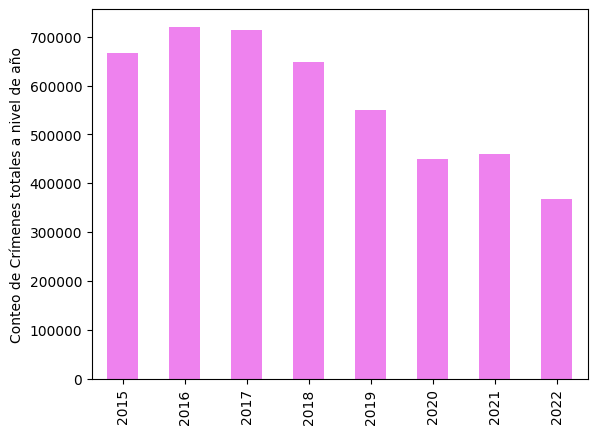

In [172]:
df = df.groupby('year').agg(['sum']).reset_index()

# Plot the dataframe
df.plot(x='year', y='ocurrencias', kind="bar",color='violet',legend =False)
plt.xlabel("")
plt.ylabel("Conteo de Crímenes totales a nivel de año")


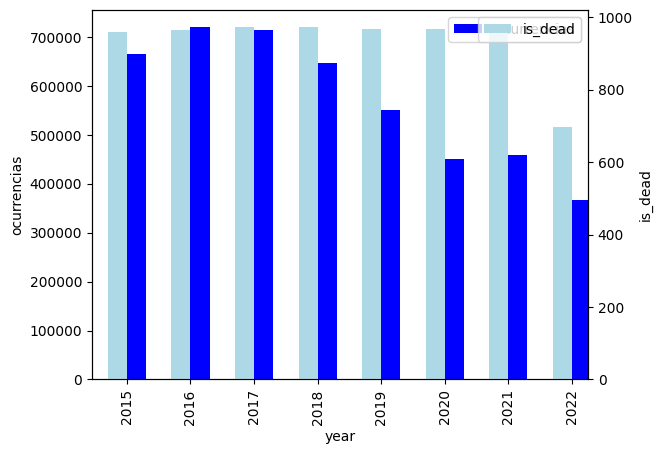

<Figure size 1600x640 with 0 Axes>

In [170]:
fig = plt.figure() # Create matplotlib figure

figure(figsize=(20, 8), dpi=80)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3
df = df.groupby('year').agg(['sum'])

df.ocurrencias.plot(kind='bar', color='blue',  ax=ax, width=width, position=0)

df.is_dead.plot(kind='bar', color='lightblue', ax=ax2, width=width, position=1)

ax.set_ylabel('ocurrencias')
ax2.set_ylabel('is_dead')
ax.legend(["Ocurrencias"]);
ax2.legend(["is_dead"]);

plt.show()

In [4]:
#Cargamos el dataset de los crimenes cometidos en Brasil
url = 'https://github.com/tmpereiram/TrabajoPractivo/blob/main/brasil_criminalidad.csv?raw=true'
df2 = pd.read_csv(url, sep=';')
df2.head(5)

,AÑO,Estado,Tipo de crimen,SUM de Ocurrencias
0,2015,Acre,Homicidio doloso,189
1,2015,Acre,Hurto en el vehículo,0
2,2015,Acre,Lesiones corporales seguidas de muerte,3
3,2015,Acre,Robo a entidad financiera,0
4,2015,Acre,Robo de mercancía,0


<ipython-input-9-f11c8b47dfb0>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df2 = df2.groupby('AÑO').agg(['sum']).reset_index()


Text(0, 0.5, 'Conteo de Crímenes totales a nivel de año')

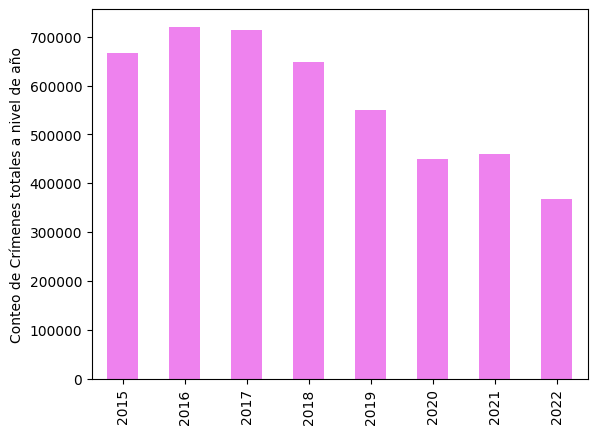

In [9]:
df2 = df2.groupby('AÑO').agg(['sum']).reset_index()

# Plot the dataframe
df2.plot(x='AÑO', y='SUM de Ocurrencias', kind="bar",color='violet',legend =False)
plt.xlabel("")
plt.ylabel("Conteo de Crímenes totales a nivel de año")